#PARCIAL DE ECONOMIA CIRCULAR Y VALORACION AMBIENTAL 
#SHIOBAM VALENTINA ESPITIA PRADA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
zl = pd.read_csv("recdemand.csv")

trips : número de viajes en bote realizados en el lago Somerville

quality : percepción subjetiva de la calidad de 1 a 5

ski factor: pregunta acerca de si el individuo hizo o no water-ski en el lago Somerville

income: ingreso anual en miles de dólares 

userfee factor: pago de suscripción anual al lago 

costC: costo de visitar Lago Conroe (alternativa al lago Somerville) 

costS: costo de visitar Lago Somerville 

costH: costo de visitar Lago Houston (alternativa al lago Somerville) 

In [9]:
zl

,trips,quality,ski,income,userfee,costC,costS,costH
0,0,0,yes,4,no,67.59,68.620,76.800
1,0,0,no,9,no,68.86,70.936,84.780
2,0,0,yes,5,no,58.12,59.465,72.110
3,0,0,no,2,no,15.79,13.750,23.680
4,0,0,yes,3,no,24.02,34.033,34.547
...,...,...,...,...,...,...,...,...
654,40,5,yes,5,yes,25.63,18.916,29.684
655,40,3,yes,3,no,18.46,13.330,25.800
656,40,2,yes,4,no,58.84,47.000,62.760
657,50,4,yes,4,no,35.67,25.694,37.269


In [10]:
zl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   trips    659 non-null    int64  
 1   quality  659 non-null    int64  
 2   ski      659 non-null    object 
 3   income   659 non-null    int64  
 4   userfee  659 non-null    object 
 5   costC    659 non-null    float64
 6   costS    659 non-null    float64
 7   costH    659 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 41.3+ KB


In [11]:
filtro = zl[(zl['trips'] > 0)]
filtro #&, |

,trips,quality,ski,income,userfee,costC,costS,costH
417,1,4,yes,4,no,41.49,49.250,37.180
418,1,3,yes,6,no,43.71,28.750,48.880
419,1,5,no,3,no,93.51,102.373,90.000
420,1,1,no,2,no,31.83,35.350,41.800
421,1,3,no,2,no,122.50,122.647,120.060
...,...,...,...,...,...,...,...,...
654,40,5,yes,5,yes,25.63,18.916,29.684
655,40,3,yes,3,no,18.46,13.330,25.800
656,40,2,yes,4,no,58.84,47.000,62.760
657,50,4,yes,4,no,35.67,25.694,37.269


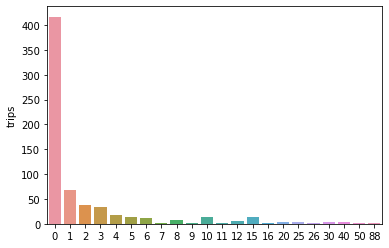

In [12]:
sns.barplot(y=zl['trips'].value_counts(),x=zl['trips'].value_counts().index)

La grafica muestra que hubo 400 personas aprox que no hicieron ningun viaje al lago Somerville

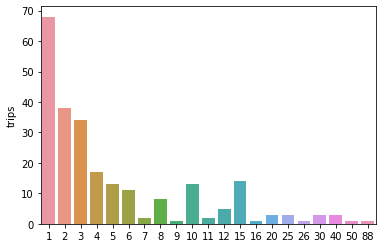

In [13]:
sns.barplot(y=filtro['trips'].value_counts(),x=filtro['trips'].value_counts().index)

Viendo la grafica se evidencia de manera mas especifica que los que hicieron un viaje fueron aprox 65 personas, comparando con los que no hicieron ningun viaje la diferencia es bastante alta, lo que nos dice que las personas tienden mas a no viajar que a viajar.

In [14]:
pd.crosstab(zl["userfee"],zl["income"])

income,1,2,3,4,5,6,7,8,9
userfee,,,,,,,,,
no,42,85,201,141,80,38,17,11,31
yes,0,2,5,3,3,0,0,0,0


In [15]:
pd.crosstab(zl["ski"],zl["income"])

income,1,2,3,4,5,6,7,8,9
ski,,,,,,,,,
no,38,74,143,86,35,14,11,5,11
yes,4,13,63,58,48,24,6,6,20


Aqui podemos ver que aunque la gente realice viajes en bote constantemente, no tienen una suscripcion al lago, y los que la tienen son pocos y viajan esporadicamente en algunos casos y en otros viajan bastante.

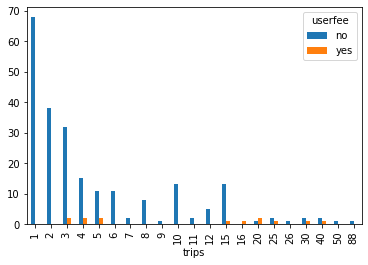

In [16]:
pd.crosstab(filtro["trips"],filtro["userfee"]).plot(kind="bar")

In [17]:
filtro.sort_values(by='trips').head(30)

,trips,quality,ski,income,userfee,costC,costS,costH
417,1,4,yes,4,no,41.49,49.250,37.180
453,1,1,no,2,no,36.81,50.117,37.060
454,1,5,no,2,no,43.00,56.450,52.160
455,1,4,no,4,no,38.75,43.150,37.760
456,1,4,yes,8,no,45.69,50.090,38.100
457,1,2,yes,6,no,71.97,73.013,70.867
458,1,4,yes,5,no,91.92,99.780,87.200
459,1,5,no,8,no,61.44,70.940,56.800
460,1,5,yes,3,no,33.95,41.450,39.580
461,1,1,no,2,no,47.84,55.920,43.360


In [22]:
filtro.sort_values(by='trips').head(30)

,trips,quality,ski,income,userfee,costC,costS,costH
417,1,4,yes,4,no,41.49,49.250,37.180
453,1,1,no,2,no,36.81,50.117,37.060
454,1,5,no,2,no,43.00,56.450,52.160
455,1,4,no,4,no,38.75,43.150,37.760
456,1,4,yes,8,no,45.69,50.090,38.100
457,1,2,yes,6,no,71.97,73.013,70.867
458,1,4,yes,5,no,91.92,99.780,87.200
459,1,5,no,8,no,61.44,70.940,56.800
460,1,5,yes,3,no,33.95,41.450,39.580
461,1,1,no,2,no,47.84,55.920,43.360


In [21]:
filtro.sort_values(by='trips').tail(30)

,trips,quality,ski,income,userfee,costC,costS,costH
641,15,4,no,4,no,78.99,68.396,84.800
642,15,3,no,1,no,27.76,12.172,31.310
639,15,4,no,3,no,18.52,15.550,24.020
638,15,3,yes,3,no,86.14,76.075,98.680
637,15,3,yes,4,no,24.92,20.338,31.020
636,15,3,yes,5,yes,73.84,65.357,88.929
640,15,3,no,4,no,49.64,40.800,60.360
634,15,5,yes,4,no,77.84,85.480,72.260
633,15,5,no,3,no,62.79,48.155,72.610
632,15,4,no,4,no,24.08,21.163,30.980


En las graficas por ejemplo de trips vemos que los datos estan mas hacia el lado izquierdo, osea hay mas datos entre 1 y 40, pero en 80 aparecen datos solos, haciendo mas dificil un analisis de estos.
Quality tiene muchos mas datos sin embargo igual los tiene mas hacia un lado ya que el lado izquierdo tiene muy pocos en cero que podrian quitarse.
Income parece intentar tener una distribucion normal, aunque tiene un vacio de 4 a 5, sus datos son parejos.
Las variables de costo podria decirse que tienen datos como escalonados, y tambien muchos datos aislados, que hacen mas dificil su analisis y solo crean un margen de error que podria evitarse si se quitaran.

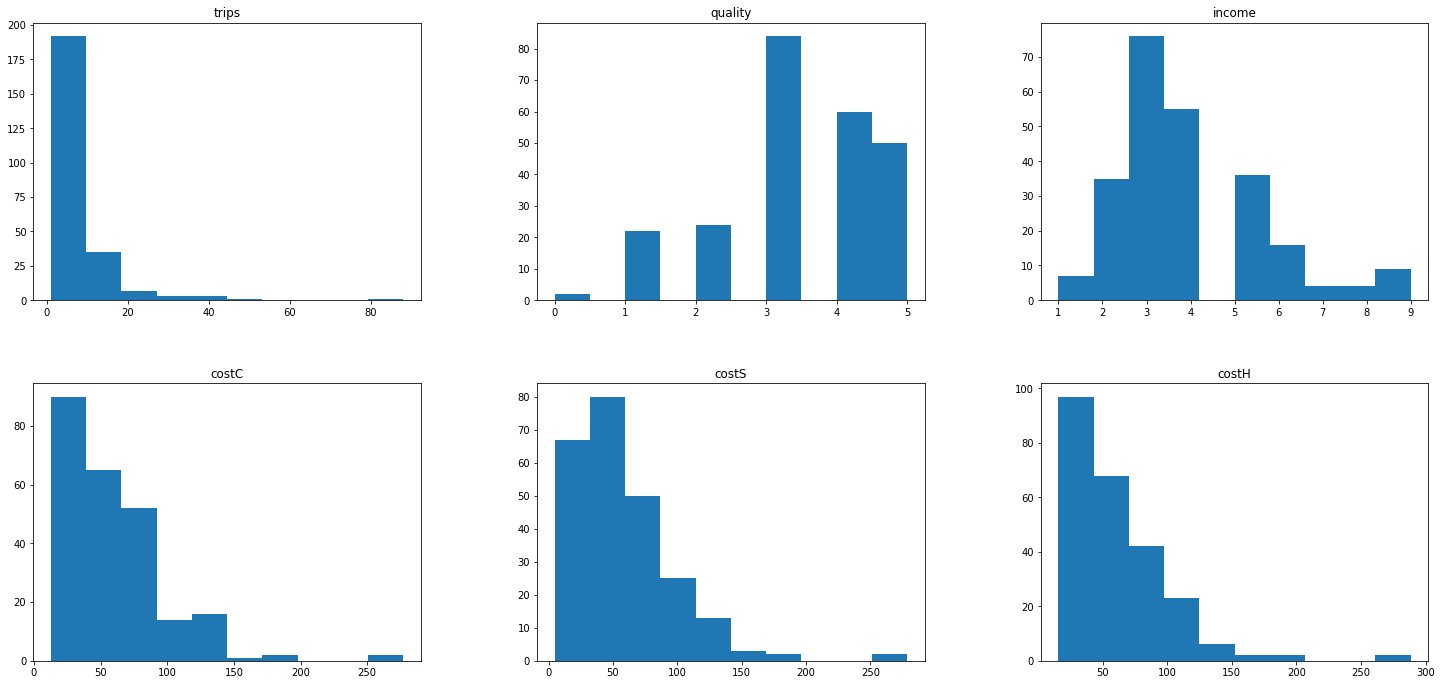

In [63]:
(filtro.drop(["ski","userfee"],axis=1)  ).hist(figsize=(25,25), layout=(4,3), grid=False)
plt.show()

In [64]:
y = filtro['trips']
x = filtro[["quality","ski","income","userfee","costS","costH","costC"]]

In [65]:
x =pd.get_dummies(x,drop_first=True)

In [66]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     7.783
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.82e-08
Time:                        01:22:15   Log-Likelihood:                -854.22
No. Observations:                 242   AIC:                             1724.
Df Residuals:                     234   BIC:                             1752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8929      2.141      3.220      0.001       2.675      11.111
quality         0.3001      0.448      0.670      0.504      -0.583       1.183
income         -0.3266      0.344     -0.950      0.343      -1.004       0.351
costS          -0.2730      0.056     -4.852      0.000      -0.384      -0.162
costH           0.0914      0.071      1.291      0.198      -0.048       0.231
costC           0.1402      0.097      1.442      0.151      -0.051       0.332
ski_yes         2.6676      1.163      2.294      0.023       0.376       4.959
userfee_yes     6.2057      2.452      2.530      0.012       1.374      11.037
==============================================================================
Omnibus:                      264.023   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12056.736
Skew:                           4.401   Prob(JB):                         0.00
Kurtosis:                      36.440   Cond. No.                         566.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Este modelo contiene todas las variables con la excepcion de que no se tuvo en cuenta los 0 en la variable trips, osea las personas que no viajaron, aqui analizamos que es un modelo con un r cuadrado del 18% de la varianza, que esta siendo explicada por el modelo, lo que nos indica que no es muy alto.

###La primera variable es quiality que tiene un 0.5% lo que nos indica que no es significativa, ya que esta se refiere a la calidad o calificacion que le dan al lugar, esto claramente no afecta en nada al modelo de predicciones de numero de viajes.

###La segunda variable es income y esta tiene 0.3, esta no es significativa porque sobrepasa el 0.05 sin embargo esta podria llegar a ser importante si se compara con el numero de viajes, ya que los ingresos podrian ser una razon por la que la gente no viaja al lago o a otros lagos.

###La tercera variable es costS osea el costo de visitar el lago somerville, este tiene un grado significativo de 0, asi que esto nos dice que es muy importante esta variable ya que claramente nos indica cuanto pagaron las personas que viajaron a este lugar. Ademas se diria que se podria rechazar la hipotesis 

###Las variables 3 y 4 que son costo de los lagos alternos al somerville no son significativos ya que tienen un valor de mas de 0.1, y se entiende ya que hablamos del lago somerville y no de los demas lagos, esto nos indica que las variables no aportan mucho al modelo.

###La quinta variable es ski y esta es de 0.02 lo que significa que si es significativa, ya que ademas nos da si la persona esquio o no y en el caso de que si ya se toma que la persona si viajo.

###La sexta es el pago de suscripcion al lago, que es de 0.01, casi 0 totalmente, dando a entender que si es significativa, ya que las personas que dicen que si, se asume totalmente que almenos han viajado una vez.


#COEFICIENTES
En los coeficientes vemos valores negativos que se podrian interpretar de la siguiente forma, en el caso de income, podriamos analizar que entre menos ingresos tiene mas viaja, ya que segun los analisis descriptivos las personas con mayor ingreso no viajan mucho, en cambio los ingresos medios-bajos si, otra es el costo de el lago somerville, entre mas bajo es el costo mas gente va a el lugar.Tambien en los coeficientes se entiende a la diferencia de intercepto que tendremos en las variables, en el caso de ski o userfee, pero en el caso del costo, si aumenta por ejempplo un punto los ingresos el costo aumentara el -0.27.

